# Distribution of the lengths of the protein coding genes 
**for the different species**

## [Log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)
It is a continuous probability distribution of a random variable whose logarithm is normally distributed. For human-readability the decimal logarithm (log10) is used.
  
**The PDF (Probability Density Function) of a normal distribution is**  
$ f(x) = \frac{1}{ \sigma \sqrt{2 \pi}} e^- \frac{1}{2} {(\frac{(x-\mu)}{\sigma})}^{2} $

## Import python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats 

import sys
sys.path.append('../../lib/')
import constants as c

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = c.STAT_G_FILE
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["species", "taxonomy_id", "trunk_genes_path", "genes_file", "count", "mean", "var", "division_both_dbs", "log10_mean", "log10_var"]]
stat_df.rename(columns = {"taxonomy_id" : 'tax_id'}, inplace = True)

# visualize data
if 1:
    pd.set_option('display.max_columns', None)
    display(stat_df.head(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

The statistical descriptions of the protein coding gene distributions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/working_on/main_work/../../lib/../main_tables/stat_protCodGenes.tsv 



,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
0,methanobacterium_bryantii_gca_002287175,2161,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699,archaea,2.827684,0.082694
1,methanobacterium_formicicum_gca_000762265,2162,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747,archaea,2.849723,0.076317


(33627, 10)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Python functions

In [3]:
# stats for the length distribution of the tax_id (species)
def get_df_for_taxid(df, taxid):
     return df.loc[ df["tax_id"]==taxid ].copy()

In [4]:
#### Function to plot the log-normal distribution
# blue: Observation
# red: Theoretical/Simulation
##########################################
def plot_log_norm (log10_len, mu, sigma, N, title, subtitle, xlabel, ylabel, dist_of): # N is number of 
    print("µ:", mu, "\tσ:", sigma)
    my_normal_dist = np.random.normal(mu, sigma, N)


    c_hex = c.COLOR_FOR_DIST[dist_of]
    count, bins, *rest = plt.hist(log10_len, 50, density=True, 
                                  alpha=0.8, color=c_hex, edgecolor='silver') # plot 60 bins
    
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r', alpha=0.5)
     
    # mean
    plt.vlines(x = mu, ymin = 0, ymax = 0.2, colors = 'white', label = 'mean')
    plt.xlim([1,7]); #plt.ylim([0,2.0])
    plt.suptitle(title, style='italic'); plt.title(subtitle + " (" + str(int(N)) +")")
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.show()

In [5]:
def does_it_fits_normal(data_observed): 
    # Kurtosis and Skewness
    # =====================
    print('Kurtosis:', stats.kurtosis(data_observed))
    print('Skewness:', stats.skew(data_observed))
    # D'Agostino's K-squared test
    # ===========================
    k2, p_value = stats.normaltest(data_observed)
    print(f"D'Agostino's K-squared test(statistics={k2}, p-value={p_value})")
    #
    # Mathematicaly it ends up beeing a theoretical log-normal when.
    #    - Kurtosis o Skewness: $\leq -1$ o $\geq 1$ 
    #    - D'Agostino's K-squared test: p-value $ \leq 0.05 $, becuase it rejects the null hypothesis 

In [6]:
# The next function performs the whole analysis for a tax_id
def species_distribution__retrieve_plot_and_fit(stat_taxid_df, tax_id, dist_of):
    species_df = get_df_for_taxid(stat_taxid_df, tax_id)
    species_df.drop_duplicates(subset=['tax_id'], inplace=True, keep='last')
    display(species_df)
    # retrieve lengths
    genes_f = c.GENES_PROTS_LENGTH_PATH + species_df["trunk_genes_path"].item() + species_df["genes_file"].item()    
    genes_df = pd.read_csv(genes_f, sep="\t")

    # visualize data
    pd.set_option('display.max_columns', None)
    if 0:
        display(genes_df.head(2))
        print(genes_df.shape)
    
    # plot the distributions: observed and theoretical
    genes_df["log10_length"] = genes_df["length"].apply(np.log10)
    title = species_df["species"].item().capitalize() + ". " + species_df["division_both_dbs"].item().capitalize()
    subtitle = "Protein coding genes"
    xlabel = "$log_{10}(length)$"
    ylabel = "Probability density function"
    plot_log_norm (genes_df["log10_length"], species_df["log10_mean"].item(), math.sqrt(species_df["log10_var"].item()), species_df["count"].item(), 
                   title, subtitle, xlabel, ylabel, dist_of)  
    # fit to normal
    does_it_fits_normal(genes_df["log10_length"])

## Distributions for different species:

### _Homo sapiens_ (tax_id = 9606)

#### Retrieve its statistical description

,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
33294,homo_sapiens,9606,ftp.ensembl.org/pub/release-98/genes/homo_sapi...,protein_coding.genes.homo_sapiens.nan.ensembl....,19976,68287.089808,1.753600e+10,vertebrates,4.40396,0.415191


µ: 4.40396048586088 	σ: 0.644352861905651


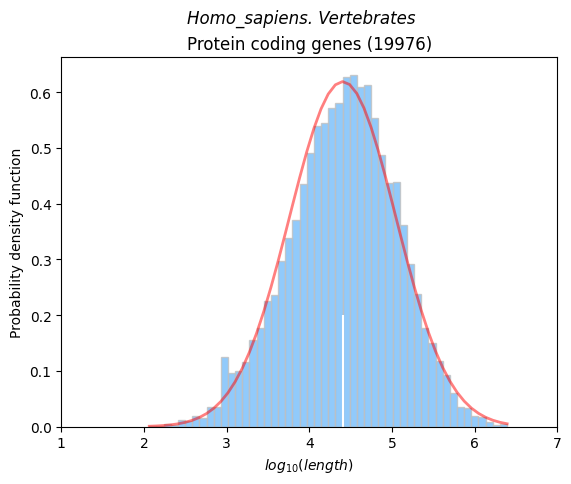

Kurtosis: -0.1116735171105625
Skewness: -0.19274087219104544
D'Agostino's K-squared test(statistics=133.03487000453904, p-value=1.293734108353449e-29)


In [7]:
tax_id = 9606
species_distribution__retrieve_plot_and_fit(stat_df, tax_id, "genes")

## Fig. 1

### _Nomascus leucogenys_

,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
33407,nomascus_leucogenys,61853,ftp.ensembl.org/pub/release-98/genes/nomascus_...,protein_coding.genes.nomascus_leucogenys.nan.e...,20648,48900.676579,1.183161e+10,vertebrates,4.124051,0.621551


µ: 4.12405131384148 	σ: 0.7883850496308304


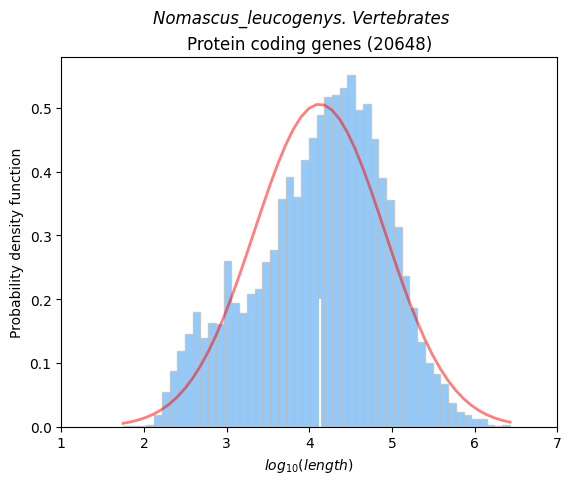

Kurtosis: -0.4348168166736075
Skewness: -0.33715264687525126
D'Agostino's K-squared test(statistics=642.455017685256, p-value=3.1093203848474545e-140)


In [8]:
tax_id = 61853
species_distribution__retrieve_plot_and_fit(stat_df, tax_id, "genes")

## Fig S1

### _Pongo abelii_ 

,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
33293,pongo_abelii,9601,ftp.ensembl.org/pub/release-98/genes/pongo_abe...,protein_coding.genes.pongo_abelii.nan.ensembl....,20424,49106.069036,1.099775e+10,vertebrates,4.111728,0.664178


µ: 4.11172806667084 	σ: 0.8149709731847209


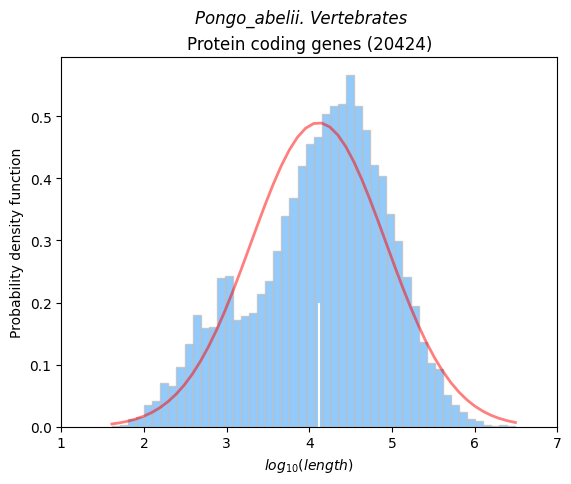

Kurtosis: -0.35897200971311927
Skewness: -0.4085978774047345
D'Agostino's K-squared test(statistics=691.567217208078, p-value=6.731112523291836e-151)


In [9]:
tax_id = 9601
species_distribution__retrieve_plot_and_fit(stat_df, tax_id, "genes")

### _Pan troglodytes_

,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
33292,pan_troglodytes,9598,ftp.ensembl.org/pub/release-98/genes/pan_trogl...,protein_coding.genes.pan_troglodytes.nan.ensem...,23302,48873.066475,1.194315e+10,vertebrates,4.085765,0.675206


µ: 4.08576487112154 	σ: 0.8217094341286694


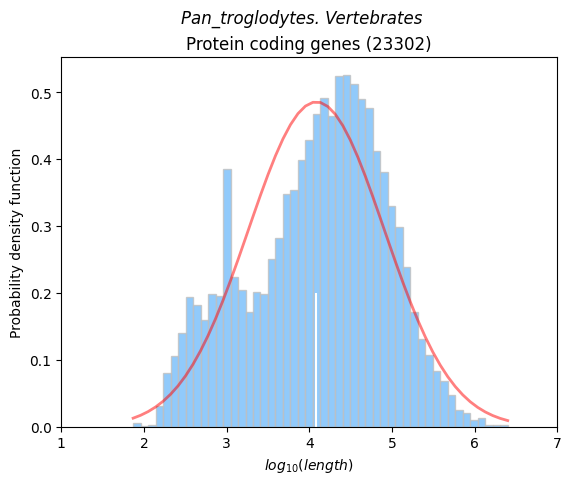

Kurtosis: -0.5924828484932867
Skewness: -0.3054273071162668
D'Agostino's K-squared test(statistics=1072.7092535261695, p-value=1.1591649839989369e-233)


In [10]:
tax_id = 9598
species_distribution__retrieve_plot_and_fit(stat_df, tax_id, "genes")

### _Pan paniscus_

,species,tax_id,trunk_genes_path,genes_file,count,mean,var,division_both_dbs,log10_mean,log10_var
33291,pan_paniscus,9597,ftp.ensembl.org/pub/release-98/genes/pan_panis...,protein_coding.genes.pan_paniscus.nan.ensembl....,21041,47740.503018,1.106692e+10,vertebrates,4.100202,0.643304


µ: 4.1002022258576 	σ: 0.802062359241374


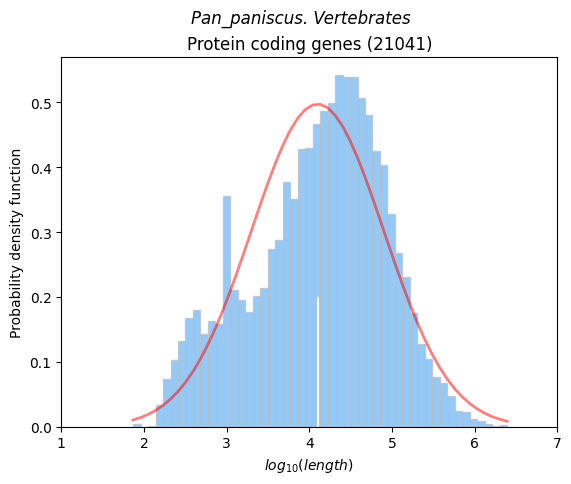

Kurtosis: -0.49293646225107013
Skewness: -0.3340017353590411
D'Agostino's K-squared test(statistics=758.5177361877178, p-value=1.949693635355806e-165)


In [11]:
tax_id = 9597
species_distribution__retrieve_plot_and_fit(stat_df, tax_id, "genes")